In [78]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [79]:
# Dictionary of situation per each day
# import the csv and append to the dictionary

current_day=17
dataframes={}

# February
for x in range(24, 30):
    globals()['df_feb_%s' % x] = pd.read_csv("COVID-19-master/dati-regioni/dpc-covid19-ita-regioni-202002"+str(x)+".csv")
    dataframes['Feb_%s' %x]=globals()['df_feb_%s' % x] 
    
# March
for x in range(1, 10):
    globals()['df_mar_%s' % x] = pd.read_csv("COVID-19-master/dati-regioni/dpc-covid19-ita-regioni-2020030"+str(x)+".csv")
    dataframes['Mar_%s' %x]=globals()['df_mar_%s' % x] 
for x in range(10, current_day+1):
    globals()['df_mar_%s' % x] = pd.read_csv("COVID-19-master/dati-regioni/dpc-covid19-ita-regioni-202003"+str(x)+".csv")
    dataframes['Mar_%s' %x]=globals()['df_mar_%s' % x] 

In [ ]:
# Dizionario abitanti per regione

lista=[0]*21
abitanti = dict(zip(df_totale_casi.columns, lista))

abitanti['Abruzzo']=1311580
abitanti['Basilicata']=562869
abitanti['P.A. Bolzano']=533050
abitanti['Calabria']=1947131
abitanti['Campania']=5801692
abitanti['Emilia Romagna']=4459477
abitanti['Friuli Venezia Giulia']=1215220
abitanti['Lazio']=5898124
abitanti['Liguria']=1550640
abitanti['Lombardia']=10018806
abitanti['Marche']=1525271
abitanti['Molise']=305617
abitanti['Piemonte']=4356406
abitanti['Puglia']=4029053
abitanti['Sardegna']=1639591
abitanti['Sicilia']=4999891
abitanti['Toscana']=3729641
abitanti['P.A. Trento']=541380 
abitanti['Umbria']=882015
abitanti['Valle d\'Aosta']=125666
abitanti['Veneto']=4905854

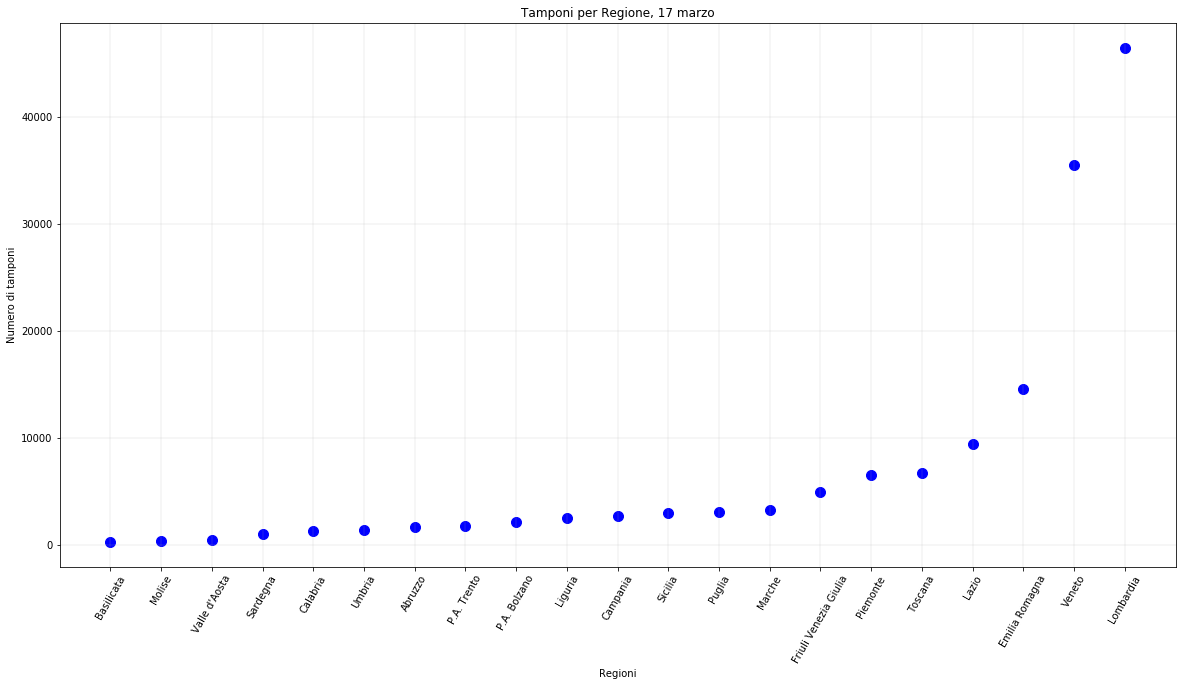

In [111]:
# Grafico tamponi per regione

plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
plt.xlabel('Regioni')
plt.grid(linewidth=0.2)
plt.ylabel('Numero di tamponi')
plt.title('Tamponi per Regione, %s marzo' % current_day)
plt.scatter(df_mar_17.sort_values(by='tamponi').denominazione_regione, df_mar_17.sort_values(by='tamponi').tamponi, color="blue",s=100)

<BarContainer object of 21 artists>

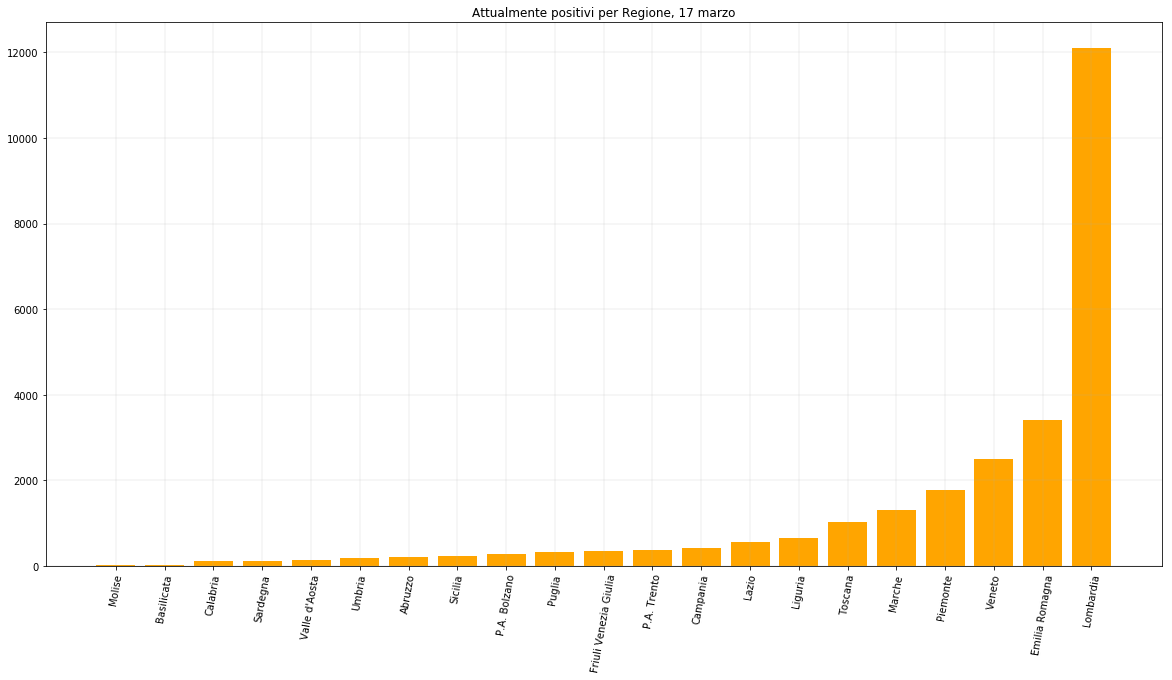

In [112]:
# Grafico positivi per regione
plt.figure(figsize=(20,10))
plt.xticks(rotation=80)
plt.grid(linewidth=0.2)
#plt.xlabel('Regioni')
#plt.ylabel('Numero di attualmente positivi')
plt.title('Attualmente positivi per Regione, %s marzo' %current_day)

plt.bar(df_mar_17.sort_values(by='totale_attualmente_positivi').denominazione_regione, df_mar_17.sort_values(by='totale_attualmente_positivi').totale_attualmente_positivi, color="orange")

In [114]:
# Creazione dataframe che mostra andamento giornaliero della statistica desiderata per ogni regione

def reg_trend(stat_type):
    lista_appoggio=[]
    for el in dataframes:
        lista_appoggio.append(dataframes[el][stat_type])
    df=pd.DataFrame(lista_appoggio)

    df.index=[x for x in dataframes]
    df.rename(inplace=True, columns=dataframes['Feb_24'].denominazione_regione, index=pd.Series([x for x in dataframes]))
    df=pd.DataFrame(df)
    return df

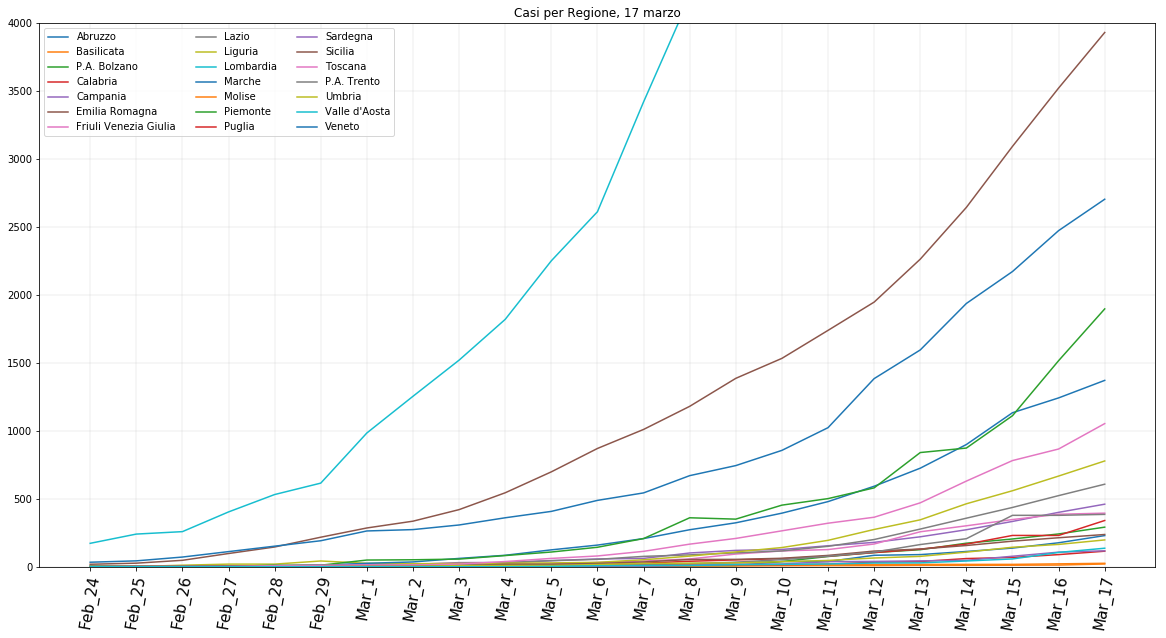

In [144]:
stat_type='totale_casi'
plt.figure(figsize=(20,10))
plt.xticks(rotation=80, size=15)
plt.ylim(0,4000)
plt.grid(linewidth=0.2)
plt.title('Casi per Regione, %s marzo' %current_day)
_=plt.plot(reg_trend(stat_type))
_=plt.legend(reg_trend(stat_type).columns.values, loc='upper left',ncol=3)
plt.show()

In [141]:
def overall_trend(stat_type):
    lista=[]
    for day in dataframes:
        lista.append(sum(dataframes[day][stat_type]))
    return lista

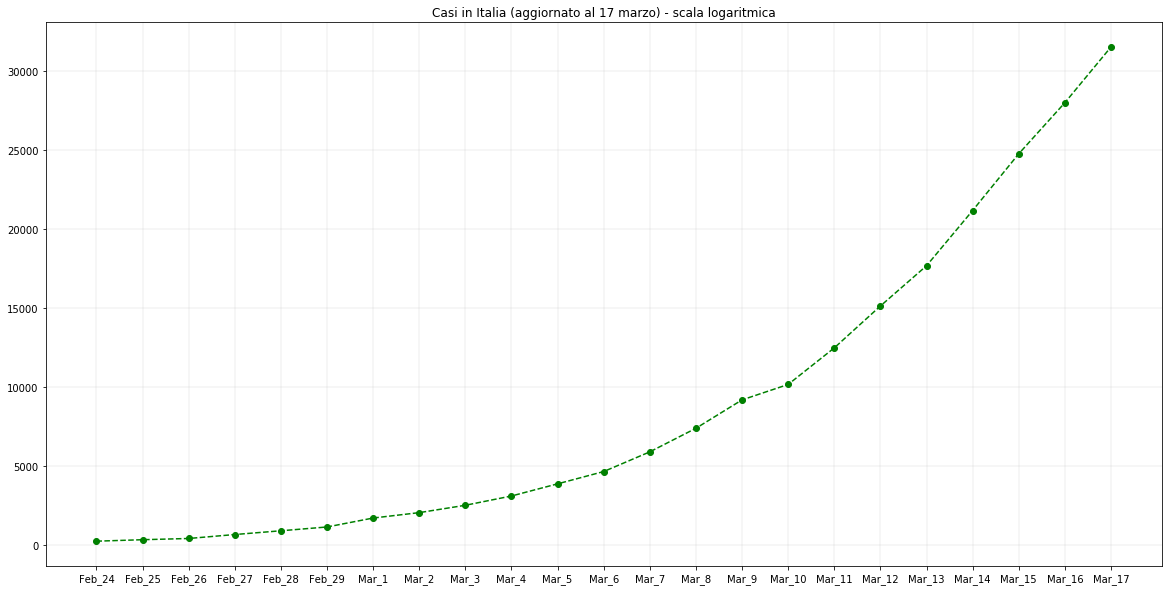

In [281]:
# Andamento nazionale della statistica desiderata

def print_overall_trend(stat_type, _color, scale='linear'):
    plt.figure(figsize=(20,10))
    plt.grid(linewidth=0.2)
    plt.yscale(scale)
    plt.title('Casi in Italia (aggiornato al %d marzo) - scala logaritmica' %current_day)
    _=plt.plot(pd.DataFrame(overall_trend(stat_type)).rename(index=pd.Series([x for x in dataframes])), 'go--',color=_color)

print_overall_trend('totale_casi', 'green')

In [269]:
def delta_var(stat_type, perc="yes"):
    delta_perc=[]
    for i in range(len(list(overall_trend(stat_type)))):
        if i==0:
            pass
        else:
            if perc=="yes":
                delta=(list(overall_trend(stat_type))[i]-list(overall_trend(stat_type))[i-1])/list(overall_trend(stat_type))[i-1]
            else:
                delta=list(overall_trend(stat_type))[i]-list(overall_trend(stat_type))[i-1]
            delta_perc.append(delta)
    return delta_perc

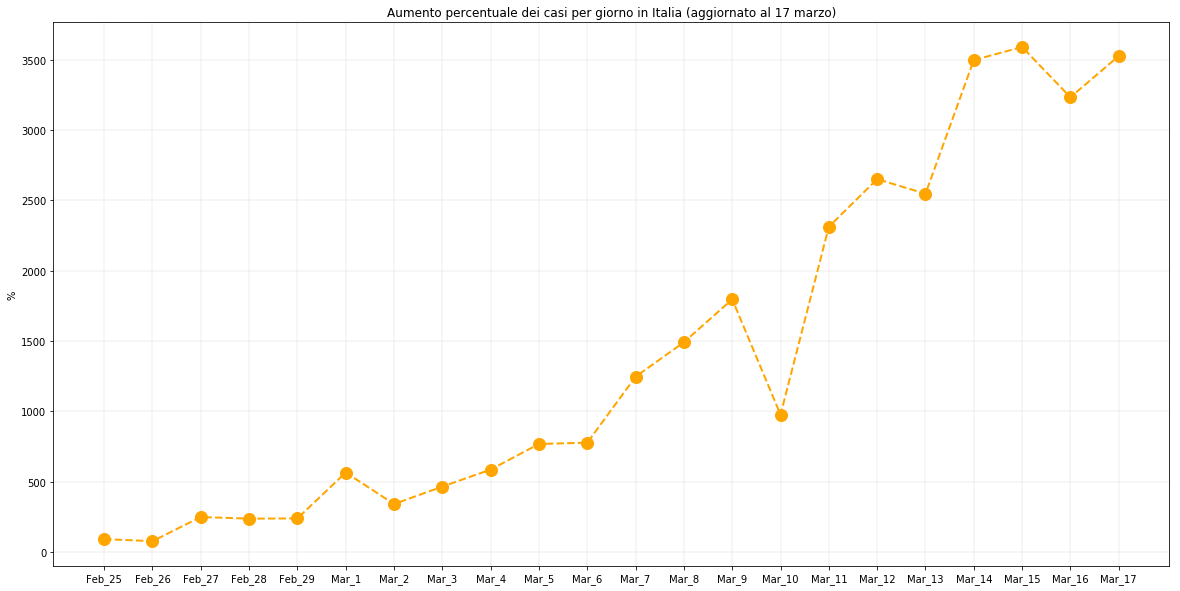

In [280]:
plt.figure(figsize=(20,10))
plt.grid(linewidth=0.2)
plt.yscale('linear')
plt.ylabel('%')
plt.title('Aumento percentuale dei casi per giorno in Italia (aggiornato al %d marzo)' %current_day)
index_=pd.Series([x for x in dataframes][1:])
_=plt.plot(pd.DataFrame(delta_var('totale_casi','no')).rename(index=index_),'go--', linewidth=2, markersize=12, color="orange")

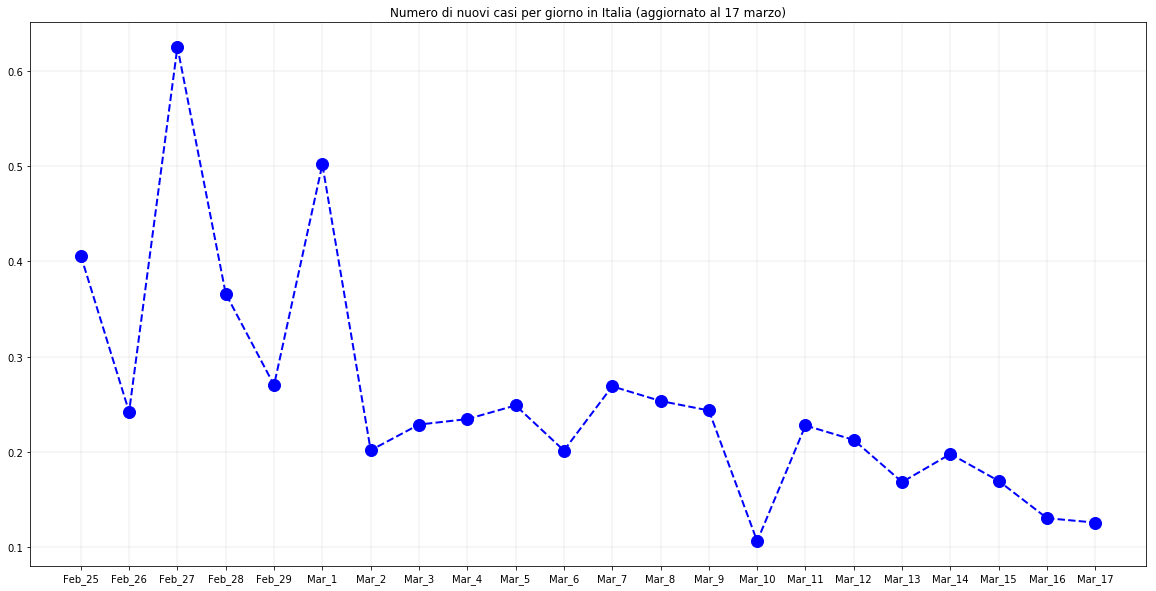

In [283]:
plt.figure(figsize=(20,10))
plt.grid(linewidth=0.2)
plt.yscale('linear')
#plt.ylabel('%')
plt.title('Numero di nuovi casi per giorno in Italia (aggiornato al %d marzo)' %current_day)
index_=pd.Series([x for x in dataframes][1:])
_=plt.plot(pd.DataFrame(delta_var('totale_casi',)).rename(index=index_),'go--', linewidth=2, markersize=12, color="blue")